In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第三位まで表示
%precision 3

'%.3f'

<span style="font-size: 200%">ホールドアウト法と関連指標</span>

**K分割交差検証の実例**

In [5]:
# インポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# 乳がんのデータ読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# K分割交差検証の実行
scores = cross_validate(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores:{}'.format(scores['test_score']))
print('Cross validation scores:{:.3f}+_{:.3f}'.format(scores['test_score'].mean(), scores['test_score'].std()))

Cross validation scores:[0.904 0.913 0.956 0.938 0.956]
Cross validation scores:0.933+_0.021


<span style="font-size: 200%">ハイパーパラメータチューニング</span>

**グリッドサーチ(スクラッチ)**

ベストスコア:0.91
その時のパラメータ(gamma. C):(0.001, 1.0)


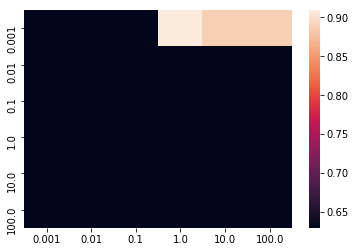

In [6]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータ読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分類
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2 , num=6):
    for C in np.logspace(-3, 2 , num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)
        
# 検証結果をscoresに格納
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma. C):{}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())


**グリッドサーチ(モジュール関数)**

In [16]:
# インポート
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんのデータ読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分類
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 0)
# GridSearchCVクラスに与えるパラメータを準備
param_grid = {'C':np.logspace(-3, 2, num=6),
              'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(), 
                  param_grid=param_grid, 
                  cv = 5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train, y_train)

# 表示
print('ベストスコア:{:.3f}'.format(gs.best_score_))
print('パラメータ:{}'.format(gs.best_params_))
print('テストスコア:{:.3f}'.format(gs.score(X_test, y_test)))

ベストスコア:0.930
パラメータ:{'C': 1.0, 'gamma': 0.001}
テストスコア:0.909
